<a href="https://colab.research.google.com/github/Zekeriya-Ui/Brownian-motion/blob/main/3_Exploiting_Correlation_Generated_scree_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

# Set the number of variables and observations
num_variables = 5
num_observations = 1000  # You can adjust this number

# Generate random variables with mean 0 and standard deviation 0.1
yield_changes = np.random.normal(loc=0, scale=0.1, size=(num_observations, num_variables))

# Verify that the variables are uncorrelated (correlation matrix should be close to identity)
correlation_matrix = np.corrcoef(yield_changes.T)
print(correlation_matrix)

[[ 1.         -0.00671788 -0.03811558  0.00627264  0.00256261]
 [-0.00671788  1.         -0.03629235  0.04994016 -0.02636407]
 [-0.03811558 -0.03629235  1.          0.04696561  0.00574053]
 [ 0.00627264  0.04994016  0.04696561  1.         -0.00575812]
 [ 0.00256261 -0.02636407  0.00574053 -0.00575812  1.        ]]


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Scale the data (important for PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(yield_changes)

# Initialize and fit PCA
pca = PCA()  # By default, it uses the correlation matrix
principal_components = pca.fit_transform(scaled_data)

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

[0.21203692 0.21091093 0.2005251  0.19620246 0.18032458]


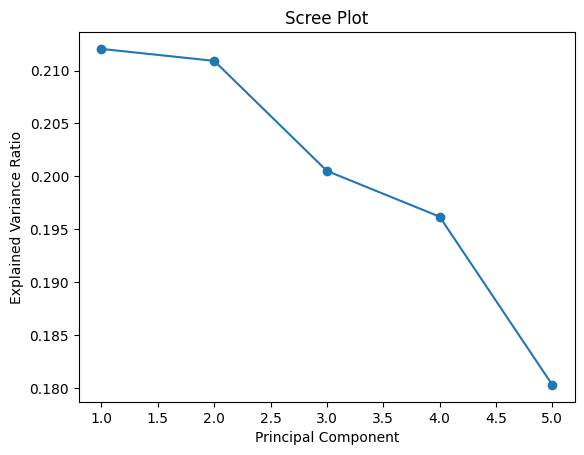

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, num_variables + 1), explained_variance_ratio, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()